In [1]:
from trips.testProblems import *
from trips.solvers.Hybrid_LSQR_new import *
from trips.decompositions import golub_kahan_update

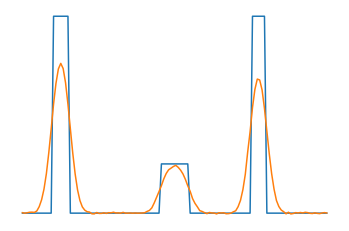

<Figure size 432x288 with 0 Axes>

In [2]:
D1D = Deblurring1D()
N = 128
A = D1D.forward_Op_matrix_1D(3, N)
x_true = D1D.gen_xtrue(N, test = 'piecewise')
b = A@x_true
(b, delta) = D1D.add_noise(b, 'Gaussian', 0.01)
plt.plot(x_true)
D1D.plot_data(b)

In [3]:
b = np.reshape(b, (b.size,1))
n = A.shape[1]
n_iter = 4
regparam = 'gcv'
beta = np.linalg.norm(b)
U = b/beta
B = np.empty(1)
V = np.empty((n,1))
RegParam = np.zeros(n_iter,)
print(U.shape)
S = B

(128, 1)


In [4]:
k = S.shape[0]
print(k)
utemp = U[:,-1]
if k == 1:
    v = A.T@utemp
else:
    v = A.T@utemp - S[k-1,k-2]*V[:,k-2]
alpha = np.linalg.norm(v)   
v = v/alpha
u = A@v - alpha*utemp
beta = np.linalg.norm(u)
u = u/beta
#U = np.hstack((U,np.reshape(u, (u.size,1))))
U = np.hstack((U,u.reshape((-1,1))))
#v = np.reshape(v, (v.size,1))
v = v.reshape((-1,1))
if k == 1:        
    V = v
else:
    V = np.hstack((V,v))
temp1 = np.zeros(k,); temp1[-1] = alpha
temp2 = np.zeros(k,); temp2[-1] = beta
if k == 1:
    S = np.array([temp1,temp2])
else:
    #S = np.hstack((S, np.reshape(temp1, (temp1.size,1))))
    S = np.hstack((S, temp1.reshape((-1,1))))
    #S = np.vstack((S, np.reshape(temp2, (1,temp2.size))))
    S = np.vstack((S, temp2.reshape((1,-1))))

1


In [5]:
S = np.vstack((S, temp2.reshape((1,-1))))

In [6]:
bhat = np.zeros(1,)
print(bhat)

[0.]


In [7]:
outp = hybrid_lsqr_new(A, b.reshape((-1,1)), 10, regparam = 'gcv')

0
(2, 1)
1
(3, 2)
0.49999998795787354
2
(4, 3)
0.4999999883174703
3
(5, 4)
0.49999998904631504
4
(6, 5)
0.49999998943234775
5
(7, 6)
0.4999999910152561
6
(8, 7)
0.49999999245681254
7
(9, 8)
0.499999986095584
8
(10, 9)
0.49999998710808924
9
(11, 10)
0.49999998633066467


In [8]:
outp

(array([ 7.42642387e-06, -1.95717569e-03, -5.00221826e-03, -8.62643493e-03,
        -1.14946095e-02, -1.12797333e-02, -4.75188468e-03,  1.18032721e-02,
         4.18328667e-02,  8.75288976e-02,  1.48815945e-01,  2.22611585e-01,
         3.02669467e-01,  3.80206498e-01,  4.45298594e-01,  4.88770859e-01,
         5.04120647e-01,  4.88954690e-01,  4.45542825e-01,  3.80325109e-01,
         3.02505968e-01,  2.22122298e-01,  1.48097405e-01,  8.67696365e-02,
         4.12077308e-02,  1.13656813e-02, -5.11070028e-03, -1.17711151e-02,
        -1.23042029e-02, -9.79613844e-03, -6.39348966e-03, -3.31036195e-03,
        -1.03428037e-03,  4.03903567e-04,  1.18973571e-03,  1.55410551e-03,
         1.68015666e-03,  1.67799104e-03,  1.60224038e-03,  1.48234581e-03,
         1.34151574e-03,  1.19589699e-03,  1.04441421e-03,  8.58446161e-04,
         5.81460644e-04,  1.40633826e-04, -5.27162218e-04, -1.42683973e-03,
        -2.44043638e-03, -3.25885539e-03, -3.33671917e-03, -1.90569199e-03,
         1.9

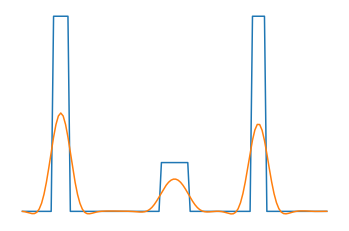

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(x_true)
D1D.plot_data(outp[0])

In [10]:
print(outp[4])

[0.         0.49999999 0.49999999 0.49999999 0.49999999 0.49999999
 0.49999999 0.49999999 0.49999999 0.49999999]


In [11]:
print(range(4))

range(0, 4)


In [12]:
n = N
b = np.reshape(b, (n, 1))
beta = np.linalg.norm(b)
U = b/beta
S = np.empty(1)
V = np.empty((n,1))

In [13]:
outp = golub_kahan_update(A, U, S, V)
U = outp[0]; S = outp[1]; V = outp[2]

In [14]:
print(np.linalg.norm(A@V - U@S))
print(S)

1.6308285889337066e-17
[[0.87866268]
 [0.26804982]]


In [ ]:
print(S.shape)
print(V.shape)

In [ ]:
B = S
bhat = np.zeros(2+1,); bhat[0] = beta
print(bhat)
L = Identity(B.shape[1], B.shape[1])
print(is_identity(L))

In [ ]:
lambdah = generalized_crossvalidation(B, bhat, L)

In [ ]:
Q_A, R_A, _ = operator_svd(B)

Q_L = Identity(L.shape[0])
R_L = Identity(L.shape[0])

R_A = np.diag(R_A)
print(R_A)
print(R_L)

In [ ]:
gcv_func = lambda reg_param: gcv_numerator(reg_param, Q_A, R_A, Q_L, R_L, bhat) / gcv_denominator(reg_param, Q_A, R_A, Q_L, R_L, bhat)

In [ ]:
lambdah = op.fminbound(func = gcv_func, x1 = 1e-05, x2 = 30, args=(), xtol=1e-12, maxfun=1000, full_output=0, disp=1)

In [ ]:
print(lambdah)

In [ ]:
outp = golub_kahan_SG(A, U, S, V)

In [ ]:
k = S.shape[0]
# print(k)
# print(U.shape)
utemp = U[:,-1]
if k == 1:
    # utemp = U
    v = A.T@utemp
else:
    # utemp = U[:,-1]
    v = A.T@utemp - S[k-1,k-2]*V[:,k-2]
# print(utemp.shape)
alpha = np.linalg.norm(v)
v = v/alpha
u = A@v - alpha*utemp
# print(u.shape)
beta = np.linalg.norm(u)
u = u/beta
# u = np.reshape(u, (n,1))
# print(u.shape)
U = np.hstack((U,np.reshape(u, (u.size,1)))) #to be made more general!
# print(U.size)
v = np.reshape(v, (v.size,1))
if k == 1:        
    V = v
else:
    V = np.hstack((V,v))
temp1 = np.zeros(k,); temp1[-1] = alpha
temp2 = np.zeros(k,); temp2[-1] = beta; #temp2 = temp2.T
if k == 1:
    S = np.array([temp1,temp2])
else:
    S = np.hstack((S, np.reshape(temp1, (temp1.size,1))))
    S = np.vstack((S, np.reshape(temp2, (1,temp2.size))))

In [ ]:
print(U.shape)
print(S.shape)
print(V.shape)
print(S)

In [ ]:
print(np.linalg.norm(A@V - U@S))

In [ ]:
print(S)
print(temp1)
print(temp2)
print(temp1.shape)
print(temp2.shape)

In [ ]:
Stemp = np.hstack((S,np.reshape(temp1, (temp1.size,1))))
print(Stemp)

In [ ]:
Stemp1 = np.vstack((Stemp,np.reshape(temp2, (1,temp2.size))))

In [ ]:
print(Stemp1)

In [ ]:
print(temp2.shape)

In [ ]:
print(S.shape)
print(temp1.shape)
S = np.hstack((S,np.reshape(temp1, (temp1.size,1))))
print(S)

In [ ]:
U = outp[0]; S = outp[1]; V = outp[2]
print(A@V - U@S)
#print((A@V).shape)

In [ ]:
b = A@x_true
print(b.shape)
#print(b.size)
b = np.reshape(b, (n, 1))
print(b.shape)
#print(b.size)

In [ ]:
u = A@v - alpha*utemp
print(u.size)

In [ ]:
print(U.size)
print(S.size)
print(V.size)

In [ ]:
U = b/beta
S = np.empty(1)
V = np.empty((n,1))
k = S.shape[0]
if k == 1:
    utemp = U
    v = A.T@utemp
else:
    utemp = U[:,-1]
    v = A.T@utemp - S[k-1,k-2]*V[:,k-2]
alpha = np.linalg.norm(v)
v = v/alpha

In [ ]:
print(k)

In [ ]:
print(utemp.shape)

In [ ]:
u = A@v - alpha*utemp
print(u.shape)

In [ ]:
U = np.hstack((U,u))
print(U.shape)

In [ ]:
k = S.shape[0]
if k == 1:
    v = A.T@U
else:
    v = A.T@U[:,-1] - S[k-1,k-2]*V[:,k-2]
print(v.shape)

In [ ]:
alpha = np.linalg.norm(v)
v = v/alpha

In [ ]:
u = A@v - alpha*U[:,-1]

In [ ]:
print((A@v).shape)
print(alpha)
print((U[:,-1]).shape)
print(U.shape)

In [ ]:
u = A@v - alpha*U
print(u.shape)

In [ ]:
U = b/beta
U = np.hstack((U,u))
print(U.shape)

In [ ]:
outp = golub_kahan_SG(A, U, S, V)
U = outp[0]; S = outp[1]; V = outp[2]

In [ ]:
U = outp[0]; S = outp[1]; V = outp[2]

In [ ]:
print(U.size)
print(S.size)
print(V.size)

In [ ]:
k = S.shape[0]
if k == 1:
    v = A.T@U
else:
    v = A.T@U[:,-1] - S[k-1,k-2]*V[:,k-2]

In [ ]:
print(v)

In [ ]:
alpha = np.linalg.norm(v)
v = v/alpha
u = A@v - alpha*U
beta = np.linalg.norm(u)
u = u/beta

In [ ]:
U = np.hstack((U,u))
if k == 1:        
    V = v
else:
    V = np.hstack((V,v))

In [ ]:
temp1 = np.zeros(k,); temp1[-1] = alpha
temp2 = np.zeros(k,); temp2[-1] = beta; temp2 = temp2.T
if k == 1:
    S = np.array([temp1,temp2])
else:
    S = np.hstack((S,temp1))
    S = np.vstack((S,temp2))

In [ ]:
print(A@V - U@S)

In [ ]:
k = S.shape[0]
print(k)

In [ ]:
if k == 1:
    v = A.T@U
else:
    v = A.T@U[:,-1] - S[k-1,k-2]*V[:,k-2]

In [ ]:
print(S[k-1,k-2])

In [ ]:
alpha = np.linalg.norm(v)
v = v/alpha
u = A@v - alpha*U[:,-1]
beta = np.linalg.norm(u)
u = u/beta

In [ ]:
print(U.size)
print(u.size)
#U = np.hstack((U,u))

In [ ]:
out = hybrid_lsqr_new(Amat, b_true, 10, 0)

In [1]:
def check_noise_type(noise_type):
    if noise_type in ['g', 'p', 'l', 'gaussian', 'Gaussian', 'Poisson', 'poisson', 'Laplace', 'laplace']:
        valid = True
    else:
        valid = False
    
    if not valid:
       raise TypeError('You must a valid name for the noise. For Gaussian noise input g or Gaussian or gaussian. For Poisson noise input p or Poisson or poisson. For Laplace noise input l or laplace or laplace.')


In [10]:
import numpy

In [16]:
isinstance(3, float)

False

In [5]:
noise_type = 'gaussan'

In [6]:
Regparam = 'p'
check_Regparam(Regparam)

ValueError: invalid literal for int() with base 10: 'p'

In [56]:
a = str('gc').isnumeric()
a
int('gc') > 0

ValueError: invalid literal for int() with base 10: 'gc'

In [74]:
# check_Regparam(Regparam = -1)
isinstance(Regparam, float) or isinstance(Regparam, int)

True

In [83]:
Regparam = 'd'
# (isinstance(Regparam, float) or isinstance(Regparam, int))
Regparam in ['gcv', 'GCV', 'Gcv', 'DP', 'dp', 'Dp', 'Discrepancy Principle', 'Discrepancy principle', 'discrepancy principle']
  

False

In [131]:
# noise_level = 'gd'
# check_noise_level(noise_level)
np.linalg.norm(2)

2.0

In [110]:
def check_noise_level(noise_level):
    valid  = False
    if (isinstance(noise_level, float) or isinstance(noise_level, int)):
        if int(noise_level) > 0 or int(noise_level) == 0:
            valid = True
    if not valid:
        raise TypeError('You must enter a valid noise level! Choose 0 for 0 %, 1 for 1%, or other valid values acordingly.')

In [84]:
def check_Regparam(Regparam = 1):
    valid = False
    case1 = False
    # if str(Regparam).isnumeric():
    if (isinstance(Regparam, float) or isinstance(Regparam, int)):
        if int(Regparam) > 0:
           valid = True
        else:
            valid = False
            case1 = True
    elif Regparam in ['gcv', 'GCV', 'Gcv', 'DP', 'dp', 'Dp', 'Discrepancy Principle', 'Discrepancy principle', 'discrepancy principle']:
        valid = True
        
    if not valid and case1 == True:
        raise TypeError("You must specify a valid regularization parameter. Input a positive number!")
    elif not valid:
        raise TypeError("You must specify a valid regularization parameter. For Generalized Cross Validation type 'gcv'. For 'Discrepancy Principle type 'dp'.")

In [19]:

def check_Positivescalar(value):
    if int(value) > 0:
        valid = True
    else:
        valid = False

    if not valid:
        raise TypeError('You must enter a positive value.')
    return valid